In [1]:
import numpy as np
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import interp1d

# Experiment 1: Law of Reflection

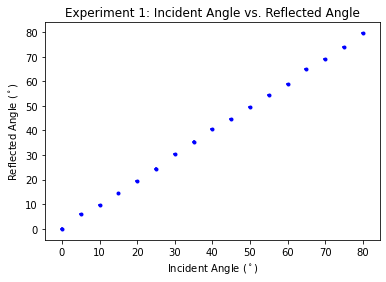

In [2]:
incident1 = np.linspace(0, 80, 17).astype(int)
reflected1 = [0.0, 6.0, 9.5, 14.5, 19.5, 24.5, 30.5, 35.5, 40.5, 44.5, 49.5, 54.5, 59.0, 65.0, 69.0, 74.0, 79.5]
error = [0.5]*17


plt.errorbar(incident1, reflected1, yerr=error, xerr = error, fmt = 'b .')
plt.title("Experiment 1: Incident Angle vs. Reflected Angle")
plt.xlabel("Incident Angle ($^\circ$)")
plt.ylabel("Reflected Angle ($^\circ$)")
plt.show()

# plt.scatter(incident1, reflected1, color = 'red', s = 1)

In [3]:
def linear (x, m, b):
    return m*x + b

opt1, cov = opt.curve_fit(linear, incident1, reflected1)
slope, yint = opt1
dslope, dyint = np.sqrt(np.diag(cov))

print(f"Slope: {slope} \u00b1 {dslope}")
print(f"y-intercept: {yint} \u00b1 {dyint}")

Slope: 0.9884803921568376 ± 0.005242654710920996
y-intercept: 0.19607843137079528 ± 0.245902219475672


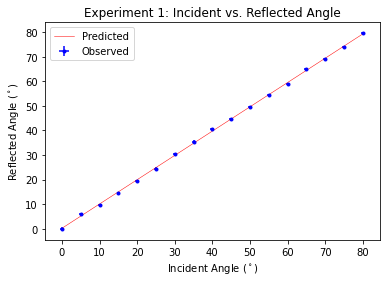

In [4]:
xvalues = np.linspace(0, 80, 17)
yvalues = slope * xvalues + yint

plt.errorbar(incident1, reflected1, yerr=error, xerr = error, fmt = 'b .')
plt.plot(xvalues, yvalues, linewidth = 0.5, c = 'r')
plt.xlabel("Incident Angle ($^\circ$)")
plt.ylabel("Reflected Angle ($^\circ$)")
plt.legend(["Predicted", "Observed"])
plt.title("Experiment 1: Incident vs. Reflected Angle")
plt.show()

In [5]:
chi_sq = 0

for i in range(len(reflected1)):
    chi_sq += (yvalues[i] - reflected1[i])**2

ddof = 2

print(f"Chi squared {chi_sq}")
print(f"Reduced chi squared: {chi_sq/ddof}")

Chi squared 4.205269607843144
Reduced chi squared: 2.102634803921572


# Experiment 2: The Law of Refraction

In [6]:
incident2 = np.linspace(10, 80, 8)
distance =  [0.6, 0.7, 1, 1.3, 1.5, 1.45, 1.1, 0.6]

actual_distance = [distance[i]/np.cos(incident2[i]* np.pi/180) for i in range(len(incident2))]


z = [(actual_distance[i]/2)/np.sqrt((actual_distance[i]/2)**2 + 2.79**2) for i in range(len(actual_distance))]

n = [np.sin(incident2[i]* np.pi/180)/z[i] for i in range(len(incident2))]
# print(n)
# print(incident2)
# print(z)


In [7]:
print(f"Mean index of refraction: {np.mean(n)}")
print(f"Standard Deviation: {np.std(n, ddof=1)}")
print(f"Standard Error: {np.std(n)/np.sqrt(7)}")

Mean index of refraction: 2.05961112109317
Standard Deviation: 0.3341497267479803
Standard Error: 0.11813976885756439


Text(0.5, 1.0, 'Index of refraction vs. Incident Angle')

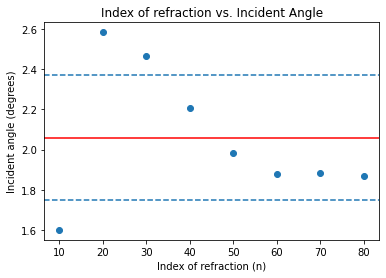

In [8]:
plt.scatter(incident2, n)
plt.axhline(np.mean(n) + np.std(n), linestyle="--")
plt.axhline(np.mean(n) - np.std(n), linestyle= "--")
plt.axhline(np.mean(n), c = 'r')
plt.xlabel("Index of refraction (n)")
plt.ylabel("Incident angle (degrees)")
plt.title("Index of refraction vs. Incident Angle")
plt.show()

# Experiment 3: Focal Length of Converging Lens

In [9]:
pos_obj = [21.3, 21.3, 20.9, 20.9, 14.8, 14.8] 
pos_image = [89.25, 89.2, 83.2, 90.3, 76.5, 77.1]
obj_size = 1.1
image_size = [2.2, 3.3, 1.9, 3.2, 2.3, 2]
pos_lens = [65, 46.3, 52.7, 45.25, 45.35, 48.8]

do = [pos_lens[i] - pos_obj[i] for i in range(len(pos_obj))]
di = [pos_image[i] - pos_lens[i] for i in range(len(pos_obj))]


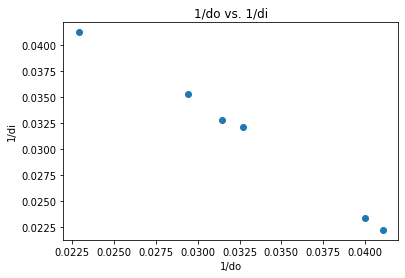

In [10]:
do_inv = [1/a for a in do]
di_inv = [1/a for a in di]


plt.scatter(do_inv, di_inv)
plt.xlabel("1/do")
plt.ylabel("1/di")
plt.title("1/do vs. 1/di")
plt.show()

In [11]:
def linear2(x, m, b):
    return m*x + b


opt2, cov2 = opt.curve_fit(linear2, do_inv, di_inv)
slope2, yint2 = opt2
dslope2, dyint2 = np.sqrt(np.diag(cov2))

print(f"Slope: {slope2} \u00b1 {dslope2}")
print(f"y-intercept: {yint2} \u00b1 {dyint2}")

Slope: -1.0656010292827995 ± 0.037463737296979924
y-intercept: 0.06624526363947845 ± 0.0012552315402690238


In [21]:
alpha_y = [np.sqrt(2)*0.05/a**2 for a in di]
alpha_x = [np.sqrt(2)*0.05/a**2 for a in do]

alphay_equiv = [np.sqrt(alpha_y[i]**2 + alpha_x[i]**2) for i in range(len(alpha_x))]


weight = [1/alpha for alpha in alphay_equiv]

b = (np.sum([di_inv[i] * weight[i] + do_inv[i]* weight[i] for i in range(len(weight))]))/np.sum(weight)

print(f"b: {b}")

alpha_b = np.sqrt(np.sum([weight[i] * alphay_equiv[i] for i in range(len(weight))])**2/np.sum(weight)**2)

print(f"alpha_b: {alpha_b}")

print(np.mean(alphay_equiv))

b: 0.06412181070198081
alpha_b: 0.00011348303930529585
0.00011422599895162338


In [13]:
# Agreement test

print(f"Agreement test: {2 * np.sqrt(alpha_b**2 + dyint2**2) < np.abs(b - yint)}")

Agreement test: True


In [14]:
# Calculating focal length. We use the mean of the two y-intercept values we calculated since the agreement test matches. 

f = 1/np.mean([b, yint2])
print(f"Focal length (cm): {f}")

Focal length (cm): 15.341296950191364


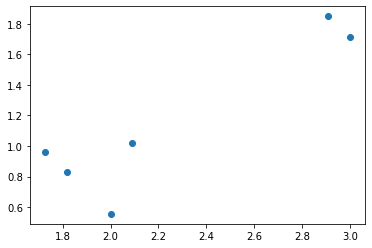

In [15]:
# Calculating magnification

height = [image/obj_size for image in image_size]
distance = [di[i]/do[i] for i in range(len(di))]

plt.scatter(height, distance)
plt.show()

Hard to argue that our values agree with the formula 

# Experiment 4: Index of Refraction redux

In [20]:
angle =  [53, 51.5, 51, 52, 51.5, 51.5]
error = 0.05

critical = [90 - a for a in angle]

index = [1/np.sin(critical[i] * np.pi/180) for i in range(len(critical))]
errors = [error/np.cos(angle[i] * np.pi/180) for i in range(len(angle))]

print(f"Refractive index: {np.mean(index)}")
print(f"Error: {np.mean(errors)}")
#The formula for total internal reflection

Refractive index: 1.6156814854487436
Error: 0.08078407427243715
